# Affects of Climate Change on Whales Seen in Southern California

#### Jennifer Bryson

The data below comes from two sources.  The whale data I webscraped from the whale sightings log of a whale watching company in Dana Point, CA.  The website is: http://www.dolphinsafari.com/sightingslog/whale-watching-sightings-archive.  Note: I believe that there are more whale watching trips in the last 4 years than the previous years, so I think the slight increases in some of the whales seen during these years is not significant, but rather an artifact of the data.  However, the decline in blue whales recently is significant.  Additionally the huge increase in humpback whales recently also seems very significant.  Turning to Google for support, I found an article from National Geographic also suggesting increasing ocean temperatures are helping out the humpback population which can be found here: https://news.nationalgeographic.com/2016/04/some-whales-are-liking-climate-change-not-being-hunted/. The second source provided the water temperature from a bouy just south of Alaska.  That data can be downloaded from: http://www.ndbc.noaa.gov/station_history.php?station=46075.  My composition of all this data is posted on my GitHub: https://github.com/jennifer-bryson.

My goal was to combine the ocean temperature data and whale sightings to analyze the affects of climate change on the whales seen in Southern California.  Immediately, we see can see some interesting trends.  For one, the humpback whale sightings have increased significantly recently, whereas the blue whale sightings have decreased recently.  Additionally the gray whales are spending more time in water that is roughtly 2 degrees Celcius warmer than it was in 2005.  Using the cross correlation between temperature and the gray whale sightings, we see that the peak of the gray whale sightings in Southern California occur 155-176 days after the peak water temperature in Alaska occurs.

I plan to complete a more rigourous time series analysis soon.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("all_whales_and_temp_cleaned.csv") as f:
    reader = csv.reader(f)
    whales = [r for r in reader]
    
whales = np.array(whales)

In [3]:
print('The row headings of our data are: ', whales[:,0])
print('The column headings of our data are: ', whales[0,:])

The row headings of our data are:  ['' 'Day 1' 'Day 2' ... 'Day 4747' 'Day 4748' 'Day 4749']
The column headings of our data are:  ['' 'Gray Whales' 'Fin Whales' 'Humpback Whales' 'Blue Whales'
 'Minke Whales' 'False Killer Whales' 'Orca Whales' 'Sei Whales' 'Temp']


In [4]:
gray = whales[1:,1]
gray = [ int(x) for x in gray ]
gray = np.array(gray)

fin = whales[1:,2]
fin = [ float(x) for x in fin ]
fin = [ int(x) for x in fin ]
fin = np.array(fin)

humpback = whales[1:,3]
humpback = [ float(x) for x in humpback ]
humpback = [ int(x) for x in humpback ]
humpback = np.array(humpback)

blue = whales[1:,4]
blue = [ int(x) for x in blue ]
blue = np.array(blue)

minke = whales[1:,5]
minke = [ float(x) for x in minke ]
minke = [ int(x) for x in minke ]
minke = np.array(minke)

temps = whales[1:,9]
temps = [ float(x) for x in temps ]
temps = np.array(temps)

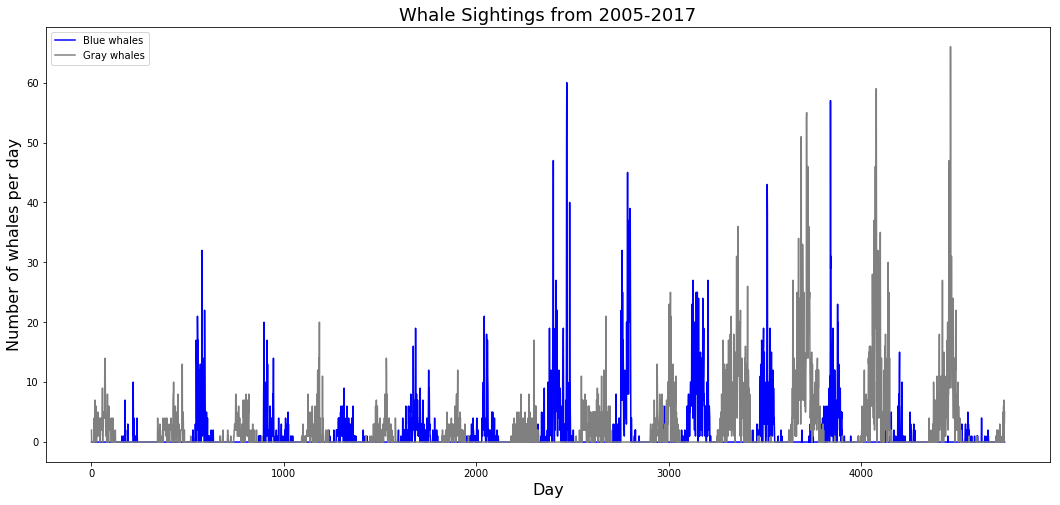

In [5]:
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.set_title('Whale Sightings from 2005-2017', fontsize=18)
plt.plot(blue ,color='blue',label='Blue whales')
plt.plot(gray ,color='gray',label='Gray whales')
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Number of whales per day', fontsize=16)
ax.legend(loc='best')
plt.show()

From the figure above it looks the the gray whales and blue whales do not seem to overlap very much.  Perhaps the increase in gray whales (and other whales) is hurting the blue whale population?

Now let's look at all our data (excluding whales that are hardly ever seen such as Orcas and Sei whales - you can check those out yourself by looking at the other columns of the data if you're interested!)

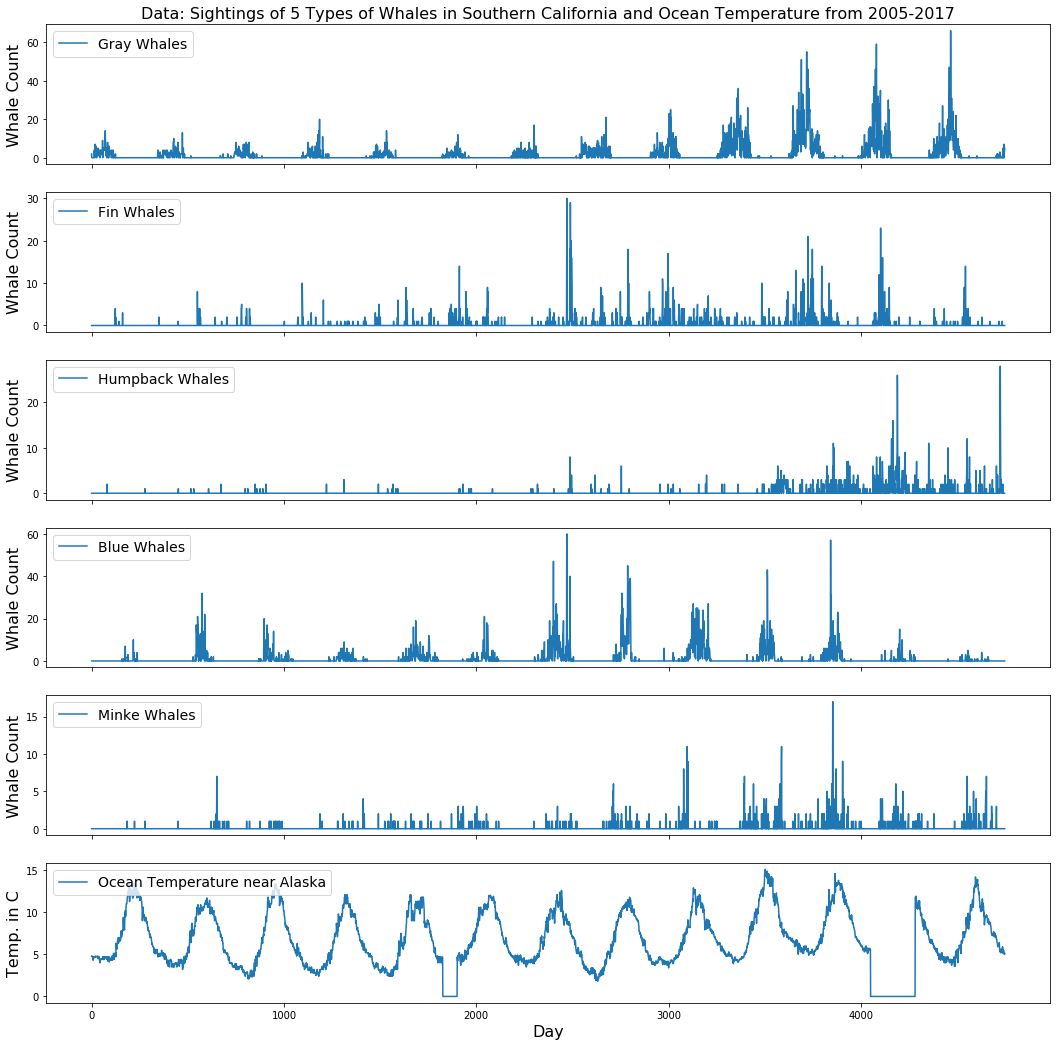

In [6]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(6, sharex=True, figsize=(18,18))
axarr[0].plot(gray, label='Gray Whales')
axarr[0].legend(loc='upper left', fontsize=14)
axarr[0].set_title('Data: Sightings of 5 Types of Whales in Southern California and Ocean Temperature from 2005-2017', fontsize=16)
axarr[1].plot(fin, label='Fin Whales')
axarr[1].legend(loc='upper left', fontsize=14)
axarr[2].plot(humpback, label='Humpback Whales')
axarr[2].legend(loc='upper left', fontsize=14)
axarr[3].plot(blue, label='Blue Whales')
axarr[3].legend(loc='upper left', fontsize=14)
axarr[4].plot(minke, label='Minke Whales')
axarr[4].legend(loc='upper left', fontsize=14)
axarr[5].plot(temps, label='Ocean Temperature near Alaska')
axarr[5].legend(loc='upper left', fontsize=14)
axarr[5].set_xlabel('Day', fontsize=16)
axarr[0].set_ylabel('Whale Count', fontsize=16)
axarr[1].set_ylabel('Whale Count', fontsize=16)
axarr[2].set_ylabel('Whale Count', fontsize=16)
axarr[3].set_ylabel('Whale Count', fontsize=16)
axarr[4].set_ylabel('Whale Count', fontsize=16)
axarr[5].set_ylabel('Temp. in C', fontsize=16)

#f.savefig('Image_whale_data_and_temp.png')

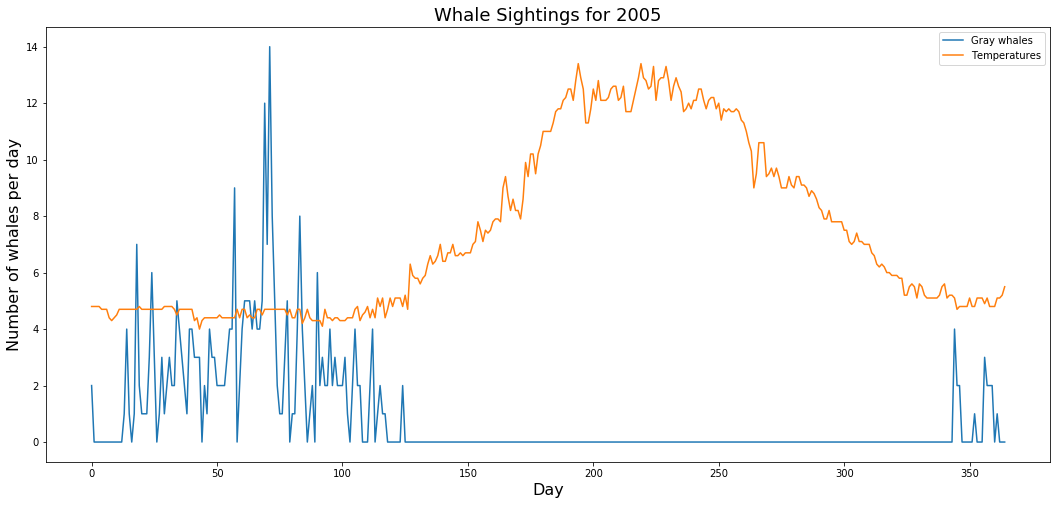

In [7]:
#Let's look at just one year because we will use cross correlation next to find the offset between the two
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(111)
ax.set_title('Whale Sightings for 2005', fontsize=18)
plt.plot(gray[0:365] ,label='Gray whales')
plt.plot(temps[0:365] ,label='Temperatures')
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Number of whales per day', fontsize=16)
ax.legend(loc='best')
plt.show()

205 is the argmax
2879.7 is the max of the correlation


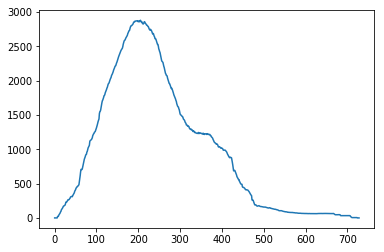

196 is the argmax
2425.3 is the max of the correlation


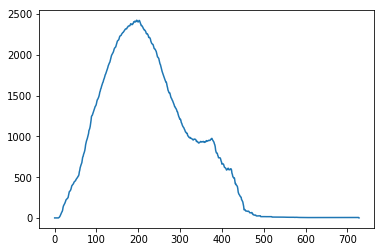

210 is the argmax
3029.7 is the max of the correlation


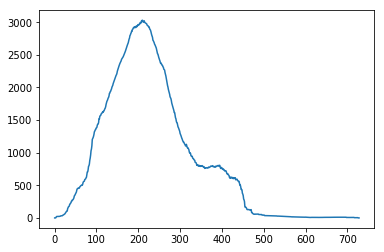

194 is the argmax
2193.8 is the max of the correlation


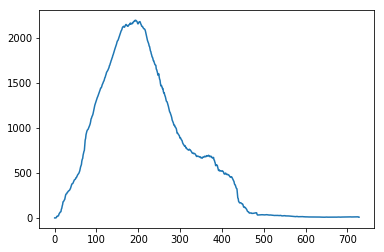

189 is the argmax
1990.6999999999998 is the max of the correlation


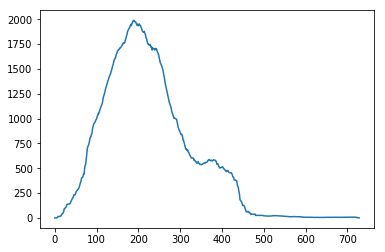

204 is the argmax
2260.6000000000004 is the max of the correlation


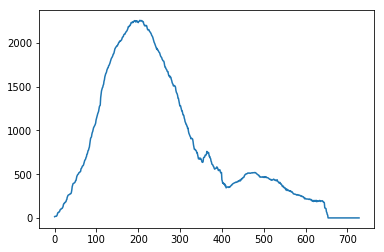

199 is the argmax
4128.1 is the max of the correlation


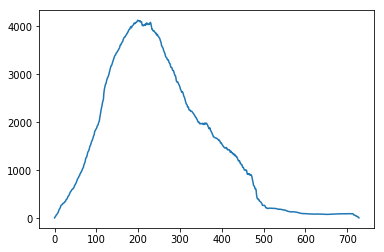

211 is the argmax
5637.099999999999 is the max of the correlation


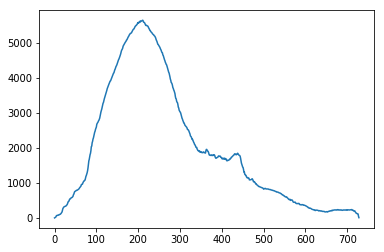

200 is the argmax
10900.499999999998 is the max of the correlation


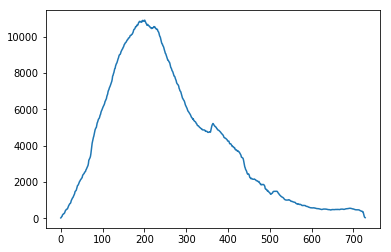

194 is the argmax
22521.199999999997 is the max of the correlation


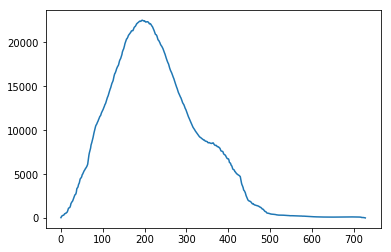

195 is the argmax
17939.9 is the max of the correlation


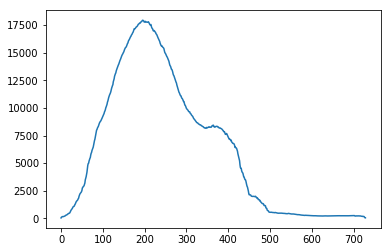

In [8]:
data_lower = 0
data_upper = 365
argmax_values = np.zeros((11,1))

for i in range(11): #there are 12 full winter seasons worth of data and the 2016 temp is bad so let's exclude it
    test = np.correlate(gray[data_lower+365:data_upper+365], temps[data_lower:data_upper],mode='full')
    print(np.argmax(test), 'is the argmax')
    print(max(test), 'is the max of the correlation')
    if i%4 == 3: #if this is currently a leap year
        argmax_values[i,0] = np.argmax(test)-366
    else:
        argmax_values[i,0] = np.argmax(test)-365
    #print(test[203])
    plt.plot(test)
    plt.show()
    if i%4 == 2:  #if the next year is a leap year
        data_lower = data_lower + 366
        data_upper = data_upper + 366
    else:
        data_lower = data_lower + 365
        data_upper = data_upper + 365

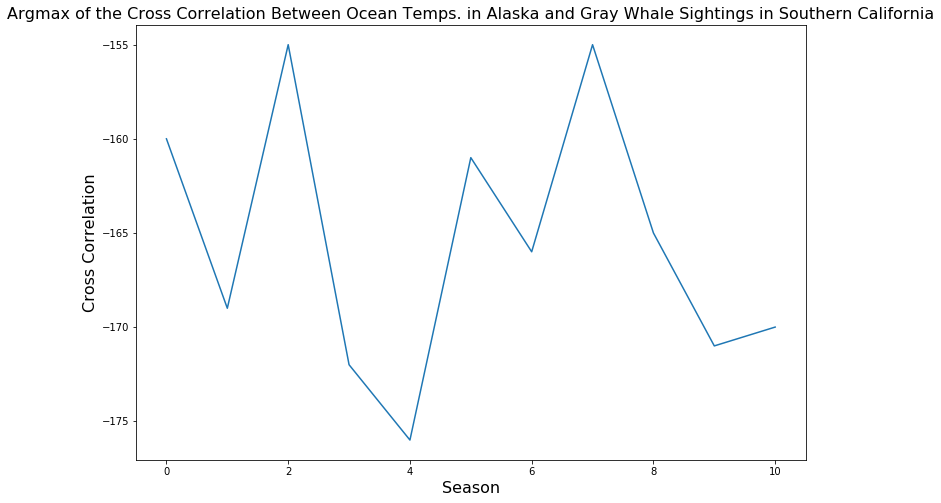

In [9]:
#print(argmax_values)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title('Argmax of the Cross Correlation Between Ocean Temps. in Alaska and Gray Whale Sightings in Southern California', fontsize=16)
plt.plot(argmax_values )
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Cross Correlation', fontsize=16)
plt.show()

Since the gray whales are seen roughly January-March in Southern California, the cross correlation between the previous year's temperature in Alaska and the current year's whale sightings relate the peak temperature of the previous year to the peak of whale sightings in Southern California.  For example the value -160 means that the peak gray whale sightings in Southern California occured roughtly 160 days after the peak water temperature in Alaska.

In [10]:
first_gray_of_season = []
for i in range(100,len(gray)):
    if gray[i] != 0 and gray[i-1]==0 and gray[i-2]==0 and gray[i-3]==0 and gray[i-4]==0 and gray[i-5]==0 \
    and gray[i-6]==0 and gray[i-7]==0 and gray[i-8]==0 and gray[i-9]==0 and gray[i-10]==0 and gray[i-11]==0 \
    and gray[i-12]==0 and gray[i-13]==0 and gray[i-14]==0 and gray[i-15]==0 and gray[i-16]==0 and gray[i-17]==0 \
    and gray[i-18]==0 and gray[i-19]==0 and gray[i-20]==0 and gray[i-21]==0 and gray[i-22]==0 and gray[i-23]==0 \
    and gray[i-24]==0 and gray[i-25]==0 and gray[i-26]==0 and gray[i-27]==0 and gray[i-28]==0 and gray[i-29]==0 \
    and gray[i-30]==0 and gray[i-31]==0 and gray[i-32]==0 and gray[i-33]==0 and gray[i-34]==0 and gray[i-35]==0 \
    and gray[i-36]==0 and gray[i-37]==0 and gray[i-38]==0 and gray[i-39]==0 and gray[i-40]==0 and gray[i-41]==0 \
    and gray[i-42]==0 and gray[i-43]==0 and gray[i-44]==0 and gray[i-45]==0 and gray[i-46]==0 and gray[i-47]==0 \
    and gray[i-48]==0 and gray[i-49]==0 and gray[i-50]==0 and gray[i-51]==0 and gray[i-52]==0 and gray[i-53]==0 \
    and gray[i-54]==0 and gray[i-55]==0 and gray[i-56]==0 and gray[i-57]==0 and gray[i-58]==0 and gray[i-59]==0 \
    and gray[i-60]==0 and gray[i-61]==0 and gray[i-62]==0 and gray[i-63]==0 and gray[i-64]==0 and gray[i-65]==0:
        first_gray_of_season.append([i])
print(len(first_gray_of_season))
print(first_gray_of_season)

13
[[344], [668], [1093], [1428], [1823], [2182], [2520], [2905], [3252], [3625], [3986], [4355], [4702]]


In [11]:
last_gray_of_season = []
for i in range(0,len(gray)-70):
    if gray[i] != 0 and gray[i+1]==0 and gray[i+2]==0 and gray[i+3]==0 and gray[i+4]==0 and gray[i+5]==0 \
    and gray[i+6]==0 and gray[i+7]==0 and gray[i+8]==0 and gray[i+9]==0 and gray[i+10]==0 and gray[i+11]==0 \
    and gray[i+12]==0 and gray[i+13]==0 and gray[i+14]==0 and gray[i+15]==0 and gray[i+16]==0 and gray[i+17]==0 \
    and gray[i+18]==0 and gray[i+19]==0 and gray[i+20]==0 and gray[i+21]==0 and gray[i+22]==0 and gray[i+23]==0 \
    and gray[i+24]==0 and gray[i+25]==0 and gray[i+26]==0 and gray[i+27]==0 and gray[i+28]==0 and gray[i+29]==0:
        last_gray_of_season.append([i])
#print(len(last_gray_of_season))
#print(last_gray_of_season)

#we had a few grays seen very late, so let's instead use the effective last gray whale seen
adjusted_last_gray = [[124], [483], [885], [1232], [1581], [1960], [2320], [2699], [3057], [3427], [3806], [4157], [4522]]
len(adjusted_last_gray)

13

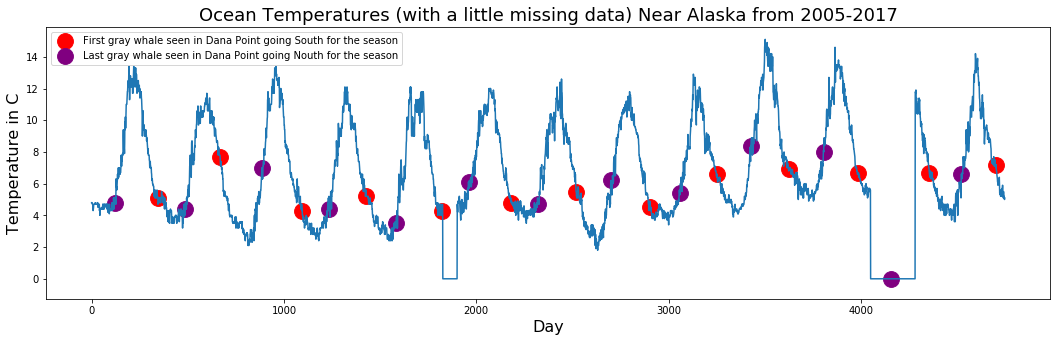

In [12]:
fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111)
ax.set_title('Ocean Temperatures (with a little missing data) Near Alaska from 2005-2017', fontsize=18)
plt.plot(temps)
#plt.plot(gray)
plt.scatter([first_gray_of_season[0]],[temps[first_gray_of_season[0]]], color='red', s=250, label='First gray whale seen in Dana Point going South for the season')
plt.scatter([adjusted_last_gray[0]],[temps[adjusted_last_gray[0]]], color='purple', s=250, label='Last gray whale seen in Dana Point going Nouth for the season')
for i in range(1,len(first_gray_of_season)):
    plt.scatter([first_gray_of_season[i]],[temps[first_gray_of_season[i]]], color='red', s=250)
    plt.scatter([adjusted_last_gray[i]],[temps[adjusted_last_gray[i]]], color='purple', s=250)

#plt.scatter([344],[5.1], color='red', s=250)


ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Temperature in C', fontsize=16)
ax.legend(loc='best')
plt.show()

In [13]:
season_lengths = []
for i in range(12): #we have 12 pairs of first/last grays seen
    season_lengths.append([adjusted_last_gray[i+1][0] - first_gray_of_season[i][0]])
print('The gray whale sighting season lengths for Dana Point are:')
print(season_lengths)

The gray whale sighting season lengths for Dana Point are:
[[139], [217], [139], [153], [137], [138], [179], [152], [175], [181], [171], [167]]


The blue whales also have a nice annual trend, so we can consider the cross correlation for them as well.

352 is the argmax
555.2 is the max of the correlation


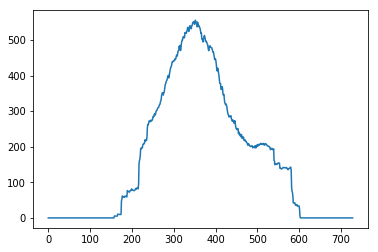

340 is the argmax
4781.700000000001 is the max of the correlation


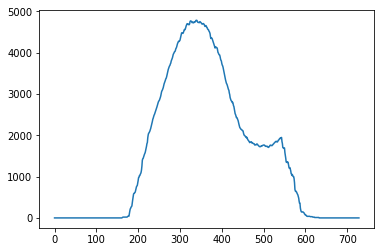

319 is the argmax
3217.3 is the max of the correlation


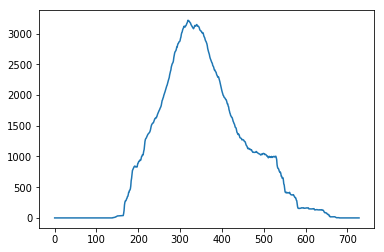

349 is the argmax
1752.2 is the max of the correlation


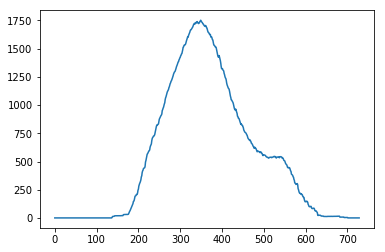

363 is the argmax
3931.8999999999996 is the max of the correlation


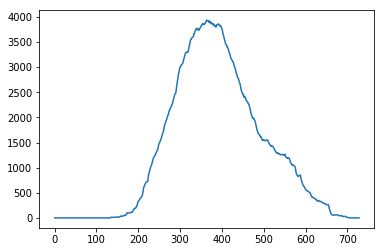

334 is the argmax
2792.1000000000004 is the max of the correlation


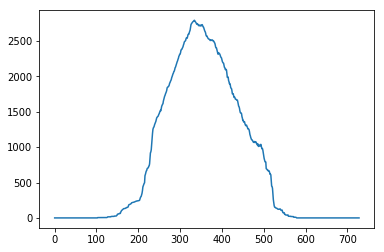

370 is the argmax
9355.7 is the max of the correlation


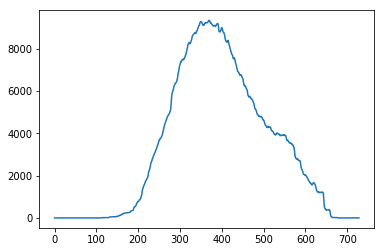

361 is the argmax
9229.900000000001 is the max of the correlation


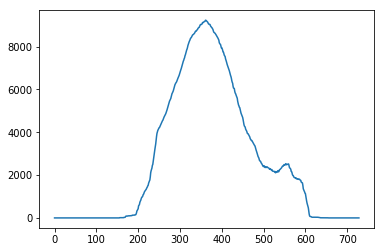

363 is the argmax
10228.699999999999 is the max of the correlation


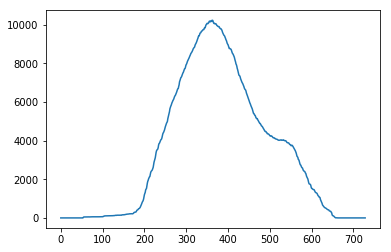

357 is the argmax
8242.2 is the max of the correlation


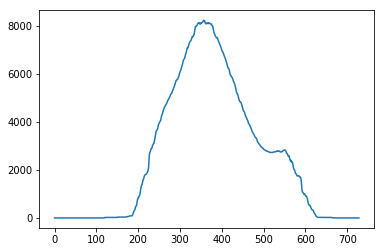

341 is the argmax
7349.5 is the max of the correlation


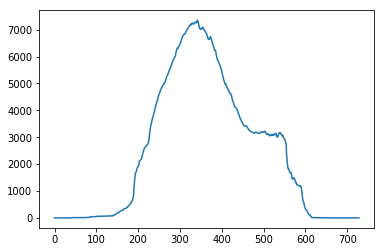

274 is the argmax
1129.0 is the max of the correlation


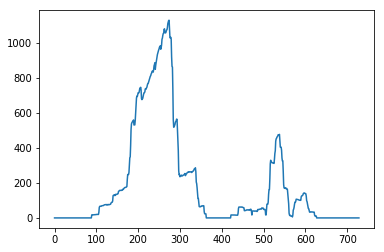

319 is the argmax
643.4 is the max of the correlation


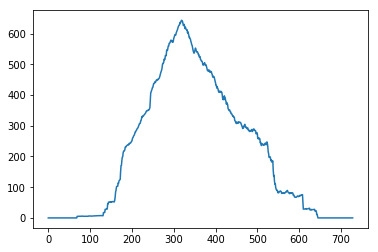

In [16]:
data_lower = 0
data_upper = 365
argmax_values = np.zeros((13,1))

for i in range(13): #there are 13 years worth of data
    test = np.correlate(blue[data_lower:data_upper], temps[data_lower:data_upper],mode='full')
    print(np.argmax(test), 'is the argmax')
    print(max(test), 'is the max of the correlation')
    if i%4 == 3: #if this is currently a leap year
        argmax_values[i,0] = np.argmax(test)-366
    else:
        argmax_values[i,0] = np.argmax(test)-365
    #print(test[203])
    plt.plot(test)
    plt.show()
    if i%4 == 2:  #if the next year is a leap year
        data_lower = data_lower + 366
        data_upper = data_upper + 366
    else:
        data_lower = data_lower + 365
        data_upper = data_upper + 365

### I hope you've enjoyed exploring this dataset as much as I have!  More analysis soon to come!